# Extract the PSD at the post-stimulus window and compare it to that of the pre-stimulus window

## The idea is to see the changes underly the evoked exponent response


In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup
# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data
from pathlib import Path
import glob
from math import floor
from mne.time_frequency import tfr_multitaper
import seaborn
from scipy import stats

# KC

In [29]:
Data_path = '/home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/*StimKC_UFV.set'
subj_files = sorted(glob.glob(Data_path))

Data_path2 = '/home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/*StimNoKC_UFV.set'
subj_files2 = sorted(glob.glob(Data_path2))

peak_idx = np.load('/home/b1044271/Columbia/Results/Evoked/localMax_KC.npy')
peak_idx2 = np.load('/home/b1044271/Columbia/Results/Evoked/localMax_noKC.npy')

time = np.load('/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/KC/NEW/Times_transitions_MT_128.npy') # time vector -5 to 5 MT

baseline = 256 #   --> -1 s


p_PSD1 = np.zeros([17,89])*np.nan
p_PSD2 = np.zeros([17,89])*np.nan

In [30]:
electrode = 'E257'

fs = 250
f_max=45

# Settings for FOOOF
SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'knee'}

i = 0
for x in subj_files:
    EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
    EEG = EEG.pick(electrode, exclude=[]) # select Cz for further analysis

    EEG_psd1 = tfr_multitaper(EEG, freqs=np.arange(1,45.5,0.5), n_cycles=np.arange(1,45.5,0.5), use_fft=True, return_itc=False,
    average=False, decim=2)
    
    XX = np.transpose(np.mean(np.squeeze(EEG_psd1._data),0))
    
    p_PSD1[i,0:89] = XX[int(peak_idx[i]),:]  # get psd at the peak
    
    i=i+1
    
    #######################################
i = 0
for x in subj_files2:   
    EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
    EEG = EEG.pick(electrode, exclude=[]) # select Cz for further analysis

    EEG_psd1 = tfr_multitaper(EEG, freqs=np.arange(1,45.5,0.5), n_cycles=np.arange(1,45.5,0.5), use_fft=True, return_itc=False,
    average=False, decim=2)
    
    XX = np.transpose(np.mean(np.squeeze(EEG_psd1._data),0))
    
    p_PSD2[i,0:89] = XX[int(peak_idx2[i]),:]  # get psd at the peak
    
    XX=[]
    print({'done'})
    
    i=i+1

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP01_all_ica_noStimKC_UFV.set...
Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP03_all_ica_noStimKC_UFV.set...
Not setting metadata
63 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP04_all_ica_noStimKC_UFV.set...
Not setting metadata
190 matching events found


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP05_all_ica_noStimKC_UFV.set...
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP06_all_ica_noStimKC_UFV.set...
Not setting metadata
54 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP07_all_ica_noStimKC_UFV.set...
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP08_all_ica_noStimKC_UFV.set...
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP10_all_ica_noStimKC_UFV.set...
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP11_all_ica_noStimKC_UFV.set...
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP12_all_ica_noStimKC_UFV.set...
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP13_all_ica_noStimKC_UFV.set...
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP14_all_ica_noStimKC_UFV.set...
Not setting metadata
130 matching events found


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP15_all_ica_noStimKC_UFV.set...
Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP16_all_ica_noStimKC_UFV.set...
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP17_all_ica_noStimKC_UFV.set...
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP18_all_ica_noStimKC_UFV.set...
Not setting metadata
144 matching events found


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP19_all_ica_noStimKC_UFV.set...
Not setting metadata
82 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP01_all_ica_noStimNoKC_UFV.set...
Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP03_all_ica_noStimNoKC_UFV.set...
Not setting metadata
63 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP04_all_ica_noStimNoKC_UFV.set...
Not setting metadata
190 matching events found


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))


No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP05_all_ica_noStimNoKC_UFV.set...
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP06_all_ica_noStimNoKC_UFV.set...
Not setting metadata
54 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP07_all_ica_noStimNoKC_UFV.set...
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP08_all_ica_noStimNoKC_UFV.set...
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP10_all_ica_noStimNoKC_UFV.set...
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP11_all_ica_noStimNoKC_UFV.set...
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP12_all_ica_noStimNoKC_UFV.set...
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP13_all_ica_noStimNoKC_UFV.set...
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP14_all_ica_noStimNoKC_UFV.set...
Not setting metadata
130 matching events found


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))


No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP15_all_ica_noStimNoKC_UFV.set...
Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP16_all_ica_noStimNoKC_UFV.set...
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP17_all_ica_noStimNoKC_UFV.set...
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP18_all_ica_noStimNoKC_UFV.set...
Not setting metadata
144 matching events found


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))


No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/KC_noKC/NEW/VP19_all_ica_noStimNoKC_UFV.set...
Not setting metadata
82 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_814582/529079461.py:26: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path2, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata
{'done'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


In [35]:
path_res = '/home/b1044271/Columbia/Results/'

np.savetxt(path_res + 'peakPSD_KC.txt',p_PSD1)
np.savetxt(path_res + 'peakPSD_noKC.txt',p_PSD2)

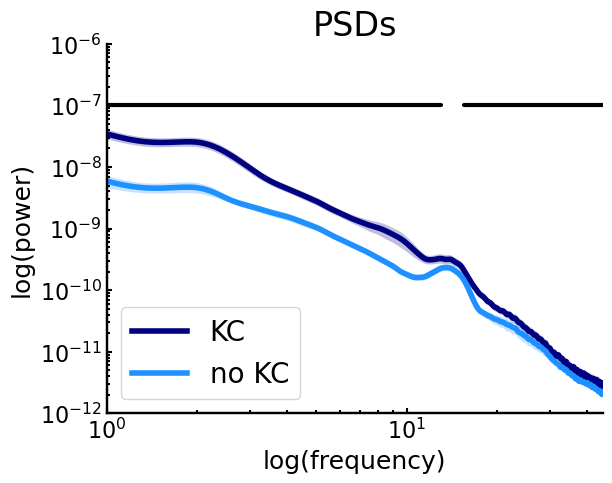

In [42]:
from scipy.interpolate import make_interp_spline, BSpline

PSD_Ps = stats.sem(p_PSD1,0, nan_policy = 'omit')
PSD_Pm = np.nanmean(p_PSD1,axis=0)

PSD_Bs = stats.sem(p_PSD2,0, nan_policy = 'omit')
PSD_Bm = np.nanmean(p_PSD2,axis=0)

df = pd.DataFrame({'col1': np.log(EEG_psd1.freqs[0:78]) , 'col2': np.repeat(10e-11,78)})
# SMOOTHING

xnew = np.linspace(EEG_psd1.freqs[0],EEG_psd1.freqs[-1],1000)

# y values
spl = make_interp_spline(EEG_psd1.freqs, PSD_Pm, k=3) #BSpline object
s_counts1=spl(xnew)
#standard error
s1 = make_interp_spline(EEG_psd1.freqs, PSD_Ps, k=3) #BSpline object
s_sem1=s1(xnew)

# y values
spl = make_interp_spline(EEG_psd1.freqs, PSD_Bm, k=3) #BSpline object
s_counts2=spl(xnew)
#standard error
s2 = make_interp_spline(EEG_psd1.freqs, PSD_Bs, k=3) #BSpline object
s_sem2=s2(xnew)


plt.plot(xnew, s_counts1, 'navy', label='KC',linewidth=4)
plt.fill_between(xnew, s_counts1-s_sem1, s_counts1+s_sem1,facecolor='navy', alpha=0.25)

plt.plot(xnew, s_counts2, 'dodgerblue', label='no KC',linewidth=4)
plt.fill_between(xnew, s_counts2-s_sem2, s_counts2+s_sem2,facecolor='dodgerblue', alpha=0.25)


plt.plot(EEG_psd1.freqs[29:89], np.repeat(10e-8,89-29), color='black', linewidth=3, solid_capstyle='round')
plt.plot(EEG_psd1.freqs[0:25], np.repeat(10e-8,25), color='black', linewidth=3, solid_capstyle='round')

plt.ylabel('log(power)', fontsize=18)
plt.title('PSDs', fontsize = 24)
plt.xlabel('log(frequency)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(EEG_psd1.freqs[0], EEG_psd1.freqs[-1])
plt.ylim(10e-13, 10e-7)

plt.legend(fontsize=20)
plt.yscale('log')
plt.xscale('log')
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_PSDs_KCnoKC.svg", dpi = 600)

# STIM NO STIM

In [23]:
Data_path = '/home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/*StimsN.set'
subj_files = sorted(glob.glob(Data_path))

peak_idx = np.load('/home/b1044271/Columbia/Results/localMax_REM.npy')

time = np.load('/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/MT/Time_5-5_MT.npy') # time vector -5 to 5 MT

baseline = 500 #  500 --> -1 s
Data_path = '/home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/*StimsN.set'
subj_files = sorted(glob.glob(Data_path))

p_PSD2 = np.zeros([17,89])*np.nan
b_PSD2 = np.zeros([17,89])*np.nan

In [24]:
electrode = 'E257'

fs = 250
f_max=45

# Settings for FOOOF
SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'knee'}

i = 0
for x in subj_files:
    EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
    EEG = EEG.pick(electrode, exclude=[]) # select Cz for further analysis

    EEG_psd1 = tfr_multitaper(EEG, freqs=np.arange(1,45.5,0.5), n_cycles=np.arange(1,45.5,0.5), use_fft=True, return_itc=False,
    average=False, decim=2)
    
    XX = np.transpose(np.mean(np.squeeze(EEG_psd1._data),0))
    
    p_PSD2[i,0:89] = XX[int(peak_idx[i]),:]  # get psd at the peak
    b_PSD2[i,0:89] = XX[baseline,:] # get PSD at baseline
    
    XX=[]
    print({'done'})
    
    i=i+1

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP01_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
255 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s finished


Not setting metadata
{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP03_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
188 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP04_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP05_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP06_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
304 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP07_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
135 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP08_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
192 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP10_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
255 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP11_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
361 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP12_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
469 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP13_StimsR.set...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP14_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP15_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
390 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s finished


Not setting metadata
{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP16_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
339 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s finished


Not setting metadata
{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP17_StimsR.set...
Not setting metadata
40 matching events found


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP18_StimsR.set...


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
165 matching events found
No baseline correction applied
0 projection items activated
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/Stim_NoStim/NEW/VP19_StimsR.set...
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_738357/1187693939.py:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata
{'done'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


# SAVING

In [25]:
path_res = '/home/b1044271/Columbia/Results/'

np.savetxt(path_res + 'peakPSD_REM.txt',p_PSD)
np.savetxt(path_res + 'basePSD_REM.txt',b_PSD)

In [233]:
NREM_p = p_PSD[::2,:]
REM_p = p_PSD[1::2,:]
Peak_all  = np.mean(np.dstack((NREM_p, REM_p)),2)

NREM_b = b_PSD[::2,:]
REM_b = b_PSD[1::2,:]
Base_all  = np.mean(np.dstack((NREM_b, REM_b)),2)

path_res = '/home/b1044271/Columbia/Results/'

np.savetxt(path_res + 'peakPSD_compiled_100ms.txt',Peak_all )
np.savetxt(path_res + 'basePSD_complied_100ms.txt',Base_all)

In [217]:
path_res = '/home/b1044271/Columbia/Results/'

np.savetxt(path_res + 'peakPSD3.txt',p_PSD )
np.savetxt(path_res + 'basePSD3.txt',b_PSD)

# Start from here to only load data and plot

In [55]:
path_res = '/home/b1044271/Columbia/Results/'

p_PSD = np.loadtxt(path_res + 'peakPSD2.txt')
b_PSD = np.loadtxt(path_res + 'basePSD2.txt')

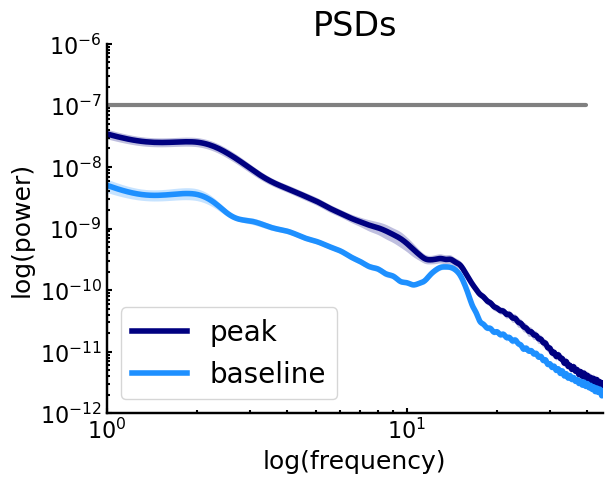

In [16]:
from scipy.interpolate import make_interp_spline, BSpline

PSD_Ps = stats.sem(p_PSD1,0, nan_policy = 'omit')
PSD_Pm = np.nanmean(p_PSD1,axis=0)

PSD_Bs = stats.sem(b_PSD1,0, nan_policy = 'omit')
PSD_Bm = np.nanmean(b_PSD1,axis=0)

df = pd.DataFrame({'col1': np.log(EEG_psd1.freqs[0:78]) , 'col2': np.repeat(10e-11,78)})
# SMOOTHING

xnew = np.linspace(EEG_psd1.freqs[0],EEG_psd1.freqs[-1],1000)

# y values
spl = make_interp_spline(EEG_psd1.freqs, PSD_Pm, k=3) #BSpline object
s_counts1=spl(xnew)
#standard error
s1 = make_interp_spline(EEG_psd1.freqs, PSD_Ps, k=3) #BSpline object
s_sem1=s1(xnew)

# y values
spl = make_interp_spline(EEG_psd1.freqs, PSD_Bm, k=3) #BSpline object
s_counts2=spl(xnew)
#standard error
s2 = make_interp_spline(EEG_psd1.freqs, PSD_Bs, k=3) #BSpline object
s_sem2=s2(xnew)


plt.plot(xnew, s_counts1, 'navy', label='peak',linewidth=4)
plt.fill_between(xnew, s_counts1-s_sem1, s_counts1+s_sem1,facecolor='navy', alpha=0.25)

plt.plot(xnew, s_counts2, 'dodgerblue', label='baseline',linewidth=4)
plt.fill_between(xnew, s_counts2-s_sem2, s_counts2+s_sem2,facecolor='dodgerblue', alpha=0.25)

# stats from matlab cluster-based permutation in fieldtrip
#plt.axvspan(EEG_psd1.freqs[0], EEG_psd1.freqs[78], alpha=0.3, color='grey')
plt.plot(EEG_psd1.freqs[0:78], np.repeat(10e-8,78), color='grey', linewidth=3, solid_capstyle='round')
#seaborn.stripplot(df, x='col1', y='col2')

plt.ylabel('log(power)', fontsize=18)
plt.title('PSDs', fontsize = 24)
plt.xlabel('log(frequency)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(EEG_psd1.freqs[0], EEG_psd1.freqs[-1])
plt.ylim(10e-13, 10e-7)

plt.legend(fontsize=20)
plt.yscale('log')
plt.xscale('log')
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

#plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_PSDs_Stim2.svg", dpi = 600)

In [75]:
path_res = '/home/b1044271/Columbia/Results/'

p_PSD = np.loadtxt(path_res + 'peakPSD2.txt')
b_PSD = np.loadtxt(path_res + 'basePSD2.txt')

# Single subject plots

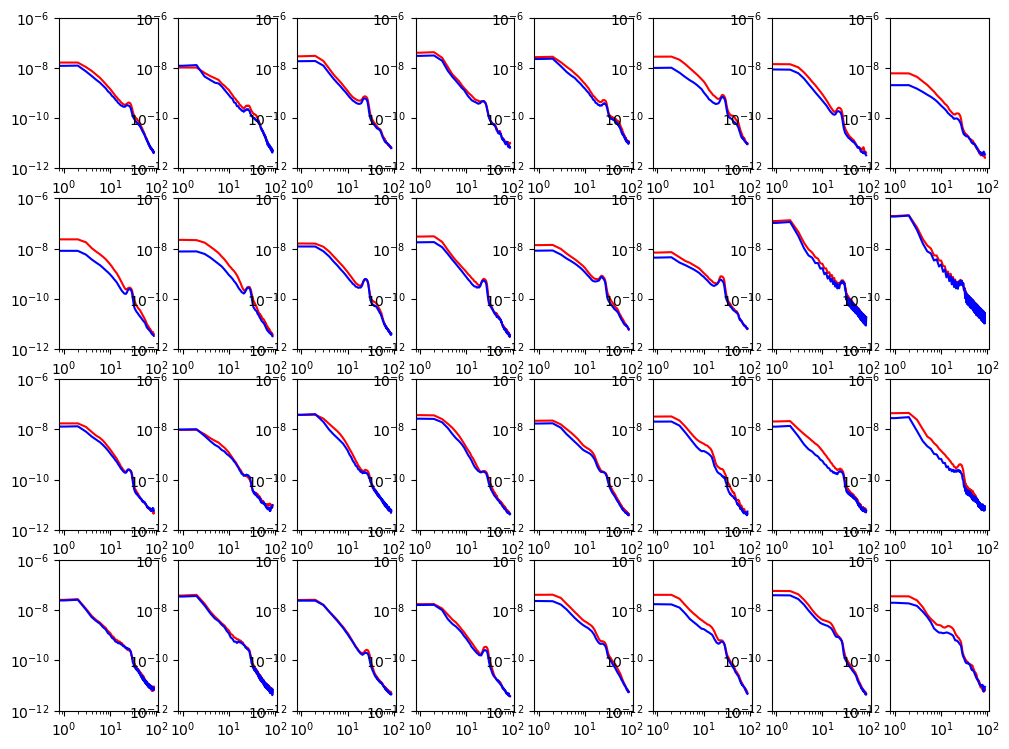

In [58]:
fig = plt.figure(figsize=(12, 9))  
for i in np.arange(32):
    
    ax = fig.add_subplot(4, 8, i+1)
    plt.loglog(p_PSD[i,:], 'r')
    plt.loglog(b_PSD[i,:],'b')
    plt.ylim(10e-13, 10e-7)

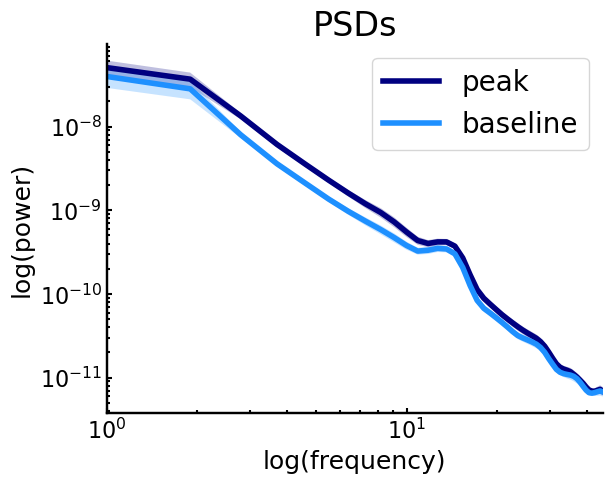

In [96]:
from scipy.interpolate import make_interp_spline, BSpline

PSD_Ps = stats.sem(p_PSD,0, nan_policy = 'omit')
PSD_Pm = np.nanmean(p_PSD,axis=0)

PSD_Bs = stats.sem(b_PSD,0, nan_policy = 'omit')
PSD_Bm = np.nanmean(b_PSD,axis=0)


# SMOOTHING

xnew = np.linspace(EEG_psd1.freqs[0],EEG_psd1.freqs[-1],50)

# y values
spl = make_interp_spline(EEG_psd1.freqs, PSD_Pm, k=3) #BSpline object
s_counts1=spl(xnew)
#standard error
s1 = make_interp_spline(EEG_psd1.freqs, PSD_Ps, k=3) #BSpline object
s_sem1=s1(xnew)

# y values
spl = make_interp_spline(EEG_psd1.freqs, PSD_Bm, k=3) #BSpline object
s_counts2=spl(xnew)
#standard error
s2 = make_interp_spline(EEG_psd1.freqs, PSD_Bs, k=3) #BSpline object
s_sem2=s2(xnew)


plt.plot(xnew, s_counts1, 'navy', label='peak',linewidth=4)
plt.fill_between(xnew, s_counts1-s_sem1, s_counts1+s_sem1,facecolor='navy', alpha=0.25)

plt.plot(xnew, s_counts2, 'dodgerblue', label='baseline',linewidth=4)
plt.fill_between(xnew, s_counts2-s_sem2, s_counts2+s_sem2,facecolor='dodgerblue', alpha=0.25)

# stats from matlab cluster-based permutation in fieldtrip
#plt.axvspan(EEG_psd1.freqs[59], EEG_psd1.freqs[-1], alpha=0.3, color='grey')


plt.ylabel('log(power)', fontsize=18)
plt.title('PSDs', fontsize = 24)
plt.xlabel('log(frequency)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(EEG_psd1.freqs[0], EEG_psd1.freqs[-1])
plt.legend(fontsize=20)
plt.yscale('log')
plt.xscale('log')
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_PSDs_Stim2.svg", dpi = 600)

# ERPs

## Get the erps of the 1s starting from the peak point

In [171]:
electrode = 'E257'
fs = 250


p_ERP=np.zeros([32,89])*np.nan
i = 0
for x in subj_files:
    EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))
    EEG = EEG.pick(electrode, exclude=[]) # select Cz for further analysis
    EEG = EEG.crop(tmin=time[int(peak_idx[i])], tmax=time[int(peak_idx[i])]+1)
    evoked = EEG.average()
    
    EEG_psd1 = tfr_multitaper(evoked, freqs=np.arange(1,45.5,0.5), n_cycles=np.arange(1,45.5,0.5), use_fft=True, 
                              return_itc=False, average=False, decim=2)
    
    p_ERP[i,0:89] = np.mean(np.squeeze(EEG_psd1._data),axis=1)
    
    print({'done'})
    i=i+1

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP01_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
1978 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP01_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
323 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP03_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
2132 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP03_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
349 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP04_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
1337 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


{'done'}
Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP04_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
569 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP05_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
2106 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


{'done'}
Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP05_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
176 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP06_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
2272 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


{'done'}
Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP06_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
558 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP07_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
1573 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


{'done'}
Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP07_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
430 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP08_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
1974 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


{'done'}
Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP08_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
453 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP10_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
2390 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


{'done'}
Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP10_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
499 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP11_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
2442 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP11_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
514 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP12_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
1320 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


{'done'}
Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP12_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
361 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP13_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
2176 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


{'done'}
Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP13_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
246 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP14_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
2597 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP14_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
566 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP15_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
1931 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP15_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
1264 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP16_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
3307 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP16_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
440 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP18_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
2609 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP18_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
672 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'done'}


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP19_StimsN.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
2180 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


{'done'}
Extracting parameters from /home/b1044271/Columbia/Preprocessed/Stage_epoched/New_stage_trans/stims/Last/VP19_StimsR.set...


/tmp/ipykernel_368957/1274573820.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(os.path.join(Data_path, x))


Not setting metadata
321 matching events found
No baseline correction applied
0 projection items activated
Ready.
Not setting metadata
{'done'}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [164]:
PSD_Ps = stats.sem(p_PSD,0, nan_policy = 'omit')
PSD_Pm = np.nanmean(p_PSD,axis=0)

PSD_Bs = stats.sem(p_ERP,0, nan_policy = 'omit')
PSD_Bm = np.nanmean(p_ERP,axis=0)


# SMOOTHING

xnew = np.linspace(EEG_psd1.freqs[0],EEG_psd1.freqs[-1],1000)

# y values
spl = make_interp_spline(EEG_psd1.freqs, PSD_Pm, k=3) #BSpline object
s_counts1=spl(xnew)
#standard error
s1 = make_interp_spline(EEG_psd1.freqs, PSD_Ps, k=3) #BSpline object
s_sem1=s1(xnew)

# y values
spl = make_interp_spline(EEG_psd1.freqs, PSD_Bm, k=3) #BSpline object
s_counts2=spl(xnew)
#standard error
s2 = make_interp_spline(EEG_psd1.freqs, PSD_Bs, k=3) #BSpline object
s_sem2=s2(xnew)


plt.plot(xnew, s_counts1, 'navy', label='peak',linewidth=4)
plt.fill_between(xnew, s_counts1-s_sem1, s_counts1+s_sem1,facecolor='navy', alpha=0.25)

plt.plot(xnew, s_counts2, 'grey', label='ERP',linewidth=4)
plt.fill_between(xnew, s_counts2-s_sem2, s_counts2+s_sem2,facecolor='grey', alpha=0.25)

# stats from matlab cluster-based permutation in fieldtrip
#plt.axvspan(EEG_psd1.freqs[59], EEG_psd1.freqs[-1], alpha=0.3, color='grey')


plt.ylabel('log(power)', fontsize=18)
plt.title('PSDs', fontsize = 24)
plt.xlabel('log(frequency)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(EEG_psd1.freqs[0], EEG_psd1.freqs[-1])
plt.legend(fontsize=20)
plt.yscale('log')
plt.xscale('log')
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

#plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_PSDs_vs_ERPs.svg", dpi = 600)

/tmp/ipykernel_368957/3840170278.py:5: RuntimeWarning: Mean of empty slice
  PSD_Bm = np.nanmean(p_ERP,axis=0)


ValueError: Array must not contain infs or nans.